In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense
from keras.layers import Flatten

In [2]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv',delimiter=',')

X_test = np.loadtxt('input_test.csv', delimiter=',')
Y_test = np.loadtxt('labels_test.csv', delimiter=',')


In [3]:
X_train = X_train.reshape(len(X_train),100,100,3)
X_test = X_test.reshape(len(X_test),100,100,3)

Y_train = Y_train.reshape(len(Y_train),1)
Y_test = Y_test.reshape(len(Y_test),1)

X_train = X_train/255
X_test = X_test/255

In [4]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2000, 100, 100, 3)
(2000, 1)
(400, 100, 100, 3)
(400, 1)


Random image being picked frm the input dataset

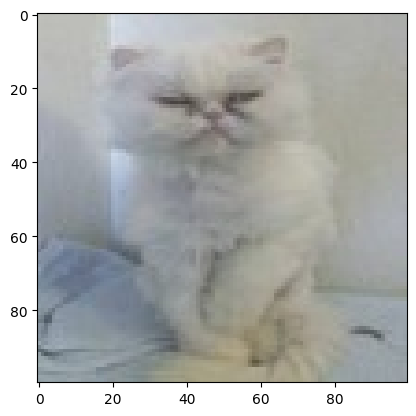

In [5]:
import random
index = random.randint(0, len(X_train))
plt.imshow(X_train[index])

In [6]:
from tensorflow.keras.layers import Dropout, BatchNormalization
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(100,100,3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(128, kernel_size=(3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(256, kernel_size=(3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(1, activation='sigmoid')
])

c:\Users\delta\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

datagen.fit(X_train)
from tensorflow.keras.callbacks import EarlyStopping

In [11]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    datagen.flow(X_train, Y_train, batch_size=32),
    epochs=50,
    validation_data=(X_test, Y_test),
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/50


c:\Users\delta\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 254ms/step - accuracy: 0.5240 - loss: 0.9746 - val_accuracy: 0.5000 - val_loss: 0.8721 - learning_rate: 0.0010
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 246ms/step - accuracy: 0.5493 - loss: 0.8393 - val_accuracy: 0.5000 - val_loss: 0.8931 - learning_rate: 0.0010
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 244ms/step - accuracy: 0.5753 - loss: 0.7597 - val_accuracy: 0.5000 - val_loss: 0.8156 - learning_rate: 0.0010
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 247ms/step - accuracy: 0.5968 - loss: 0.7663 - val_accuracy: 0.5050 - val_loss: 0.7852 - learning_rate: 0.0010
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 240ms/step - accuracy: 0.6480 - loss: 0.6635 - val_accuracy: 0.5100 - val_loss: 0.8646 - learning_rate: 0.0010
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 242ms/step - accuracy: 0.6179 - loss: 0.6863 - val_accuracy: 0.5300 - val_loss: 0.9225 - learning_rate: 0.0010
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 243ms/step - accuracy: 0.6393 - loss: 0.6757 - val_

In [12]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(Y_train), y=Y_train.flatten())
class_weight_dict = dict(enumerate(class_weights))

# Use this in model.fit()
history = model.fit(
    datagen.flow(X_train, Y_train, batch_size=32),
    epochs=50,
    validation_data=(X_test, Y_test),
    callbacks=[early_stop, reduce_lr],
    class_weight=class_weight_dict
)

Epoch 1/50


c:\Users\delta\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 218ms/step - accuracy: 0.8157 - loss: 0.3957 - val_accuracy: 0.8325 - val_loss: 0.3854 - learning_rate: 1.0000e-06
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 218ms/step - accuracy: 0.8255 - loss: 0.4068 - val_accuracy: 0.8325 - val_loss: 0.3851 - learning_rate: 1.0000e-06
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 242ms/step - accuracy: 0.8161 - loss: 0.4087 - val_accuracy: 0.8300 - val_loss: 0.3857 - learning_rate: 1.0000e-06
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 233ms/step - accuracy: 0.8176 - loss: 0.4189 - val_accuracy: 0.8275 - val_loss: 0.3853 - learning_rate: 1.0000e-06
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 241ms/step - accuracy: 0.8160 - loss: 0.4012 - val_accuracy: 0.8350 - val_loss: 0.3853 - learning_rate: 1.0000e-06
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 264ms/step - accuracy: 0.8277 - loss: 0.4030 - val_accuracy: 0.8400 - val_loss: 0.3851 - learning_rate: 1.0000e-06
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 252ms/step - accuracy: 0.82

In [15]:
model.evaluate(X_test, Y_test)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8605 - loss: 0.3203


[0.38334664702415466, 0.8424999713897705]

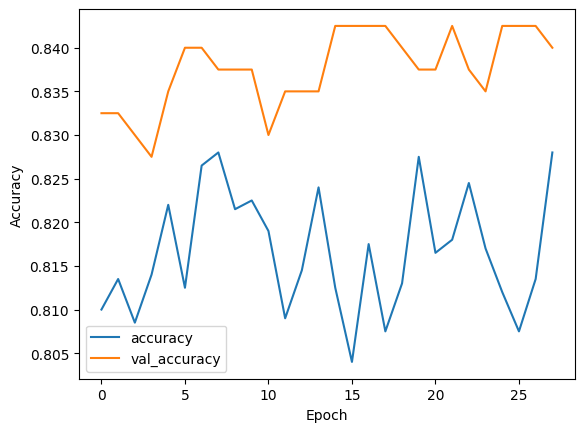

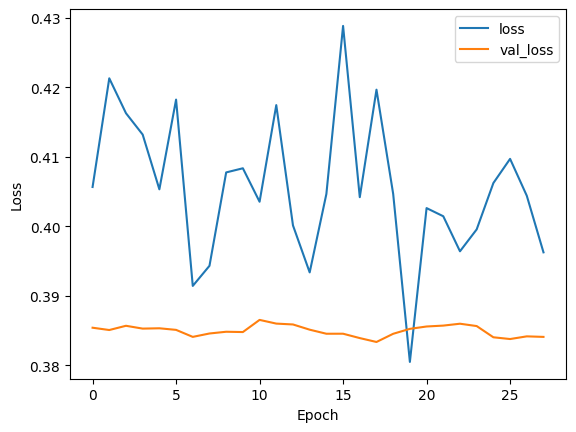

In [16]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()